In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import os
import csv
from PIL import Image

In [2]:
cd = os.getcwd()
path = cd+"\\patterns"
if os.path.isdir(path) == False:
    os.mkdir(path)
    print("Directory created.")
else:
    print("Directory existed.")

Directory existed.


In [3]:
edg = 64

In [4]:
def one_pattern(size, shape, x, y):
    pattern = np.zeros([edg, edg])
    for ii in range(size):
        for jj in range(size):
            if shape == 0:
                pattern[x+ii, y+jj] = 1
            elif shape ==1:
                if np.abs(ii-jj)<size/2:
                    pattern[x+ii, y+jj] = 1
    return pattern

In [5]:
def gen_img(pattern):
    pattern = pattern.reshape(edg, edg)
    p1 = plt.imshow(pattern)
    return p1

In [46]:
def gen_patterns(label=3, size=3, shape=0):
    # N: number of pattern in one data
    # size: size of one pattern
    # num: copy of data
    # shape: shape of pattern
    patterns = np.zeros([edg*edg])
    for n_N in range(label):
        x,y = np.random.randint(0,edg-size, 2)
        #non-overlapping
        temp_patterns = patterns.reshape(edg, edg)
        #random size
        #Size = np.random.randint(3, 10)
        #print (Size)
        Size = size
        while (temp_patterns[x:x+size, y:y+size]).sum() > 0:
            x,y = np.random.randint(0,edg-size, 2)  
        patterns = patterns + (one_pattern(size=Size, shape=shape, x=x, y=y)).reshape([edg*edg])
    for kk in range(len(patterns)):
        if patterns[kk]>1:
            patterns[kk] = 1
    return patterns

In [37]:
size=10
max_label = 10
shape=0
N=5000
labels = np.random.randint(0,max_label, size=(N))
patterns = np.asarray([gen_patterns(label = label, size=size, shape=shape) for label in labels]).reshape(N, edg*edg)

title = "\\patterns_random_label"+"_"+str(N)+"_random_size_"+"_shape_"+str(shape)+"_nonoverlapping"
filename=path + title
np.save(filename, patterns)
print("File saved: "+title)

title = "\\labels_random_label"+"_"+str(N)+"_random_size_"+"_shape_"+str(shape)+"_nonoverlapping"
filename=path + title
labels_mat = np.zeros((N, max_label))
for kk in range(len(labels)):
    labels_mat[kk, labels[kk]]=1
np.save(filename, labels_mat)
print("File saved: "+title)


File saved: \patterns_random_label_5000_random_size__shape_0_nonoverlapping
File saved: \labels_random_label_5000_random_size__shape_0_nonoverlapping


In [21]:
title = "\\patterns_random_label"+"_"+str(N)+"_random_size_"+"_shape_"+str(shape)+"_nonoverlapping"
filename=path + title
patterns = np.load(filename+".npy")
title = "\\labels_random_label"+"_"+str(N)+"_random_size_"+"_shape_"+str(shape)+"_nonoverlapping"
filename=path + title
labels = np.load(filename+".npy")

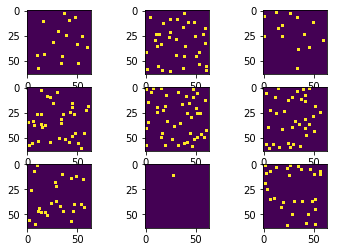

[[16 34 14]
 [34 43 35]
 [25  1 29]]


In [22]:
f1 = plt.figure()
for ii in range(9):
    plt.subplot(3,3,ii+1)
    p1=gen_img(patterns[ii+9])
plt.show(f1)
print(np.argmax(labels[9:9+9], axis=1).reshape(3,3))

In [62]:
p = gen_patterns(label=10, size=3, shape=0)

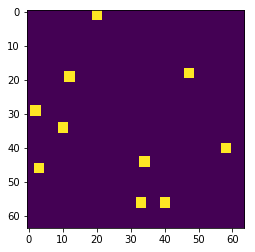

In [63]:
f2 = plt.figure()
gen_img(p)
plt.show(f2)

In [64]:
f2.savefig("img_examples_nonoverlapping.png")
f2.savefig("img_examples_nonoverlapping.pdf")